### Libraries Import & Data IMport

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('car_insurance.csv')
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

It's always good to have a backup.

In [12]:
data = df.copy()
data = data.drop(['id','postal_code'], axis = 1)
data.head()

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  int64  
 1   gender               10000 non-null  int64  
 2   driving_experience   10000 non-null  object 
 3   education            10000 non-null  object 
 4   income               10000 non-null  object 
 5   credit_score         9018 non-null   float64
 6   vehicle_ownership    10000 non-null  float64
 7   vehicle_year         10000 non-null  object 
 8   married              10000 non-null  float64
 9   children             10000 non-null  float64
 10  annual_mileage       9043 non-null   float64
 11  vehicle_type         10000 non-null  object 
 12  speeding_violations  10000 non-null  int64  
 13  duis                 10000 non-null  int64  
 14  past_accidents       10000 non-null  int64  
 15  outcome              10000 non-null  

In [14]:
(data.isnull().mean()*100).round(2).sort_values(ascending=False)

credit_score           9.82
annual_mileage         9.57
age                    0.00
gender                 0.00
driving_experience     0.00
education              0.00
income                 0.00
vehicle_ownership      0.00
vehicle_year           0.00
married                0.00
children               0.00
vehicle_type           0.00
speeding_violations    0.00
duis                   0.00
past_accidents         0.00
outcome                0.00
dtype: float64

In [15]:
data = data.dropna()
data = data.drop_duplicates()

In [16]:
data['vehicle_type'].value_counts()

vehicle_type
sedan         7761
sports car     388
Name: count, dtype: int64

### Data Cleaning

In [17]:
num_cols = ['credit_score','children','annual_mileage','speeding_violations','duis','past_accidents']
bool_cols = ['vehicle_ownership','vehicle_year','married','vehicle_type']

cat_cols =  [col for col in data if col not in num_cols+bool_cols]
print(cat_cols)

['age', 'gender', 'driving_experience', 'education', 'income', 'outcome']


### Explanatory Data Analysis

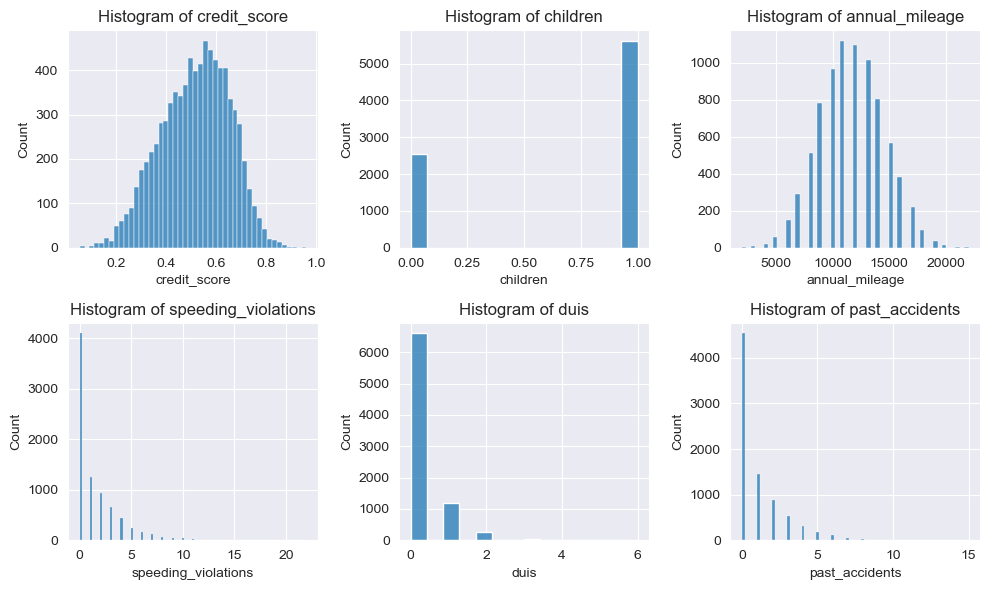

In [20]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(x = col, data=data,ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [21]:
for col in cat_cols:
    print(data[col].value_counts())

age
1    2475
2    2412
3    1641
0    1621
Name: count, dtype: int64
gender
0    4084
1    4065
Name: count, dtype: int64
driving_experience
0-9y      2864
10-19y    2662
20-29y    1756
30y+       867
Name: count, dtype: int64
education
high school    3404
university     3217
none           1528
Name: count, dtype: int64
income
upper class      3588
middle class     1727
poverty          1459
working class    1375
Name: count, dtype: int64
outcome
0.0    5613
1.0    2536
Name: count, dtype: int64


### visualizing categorical variables

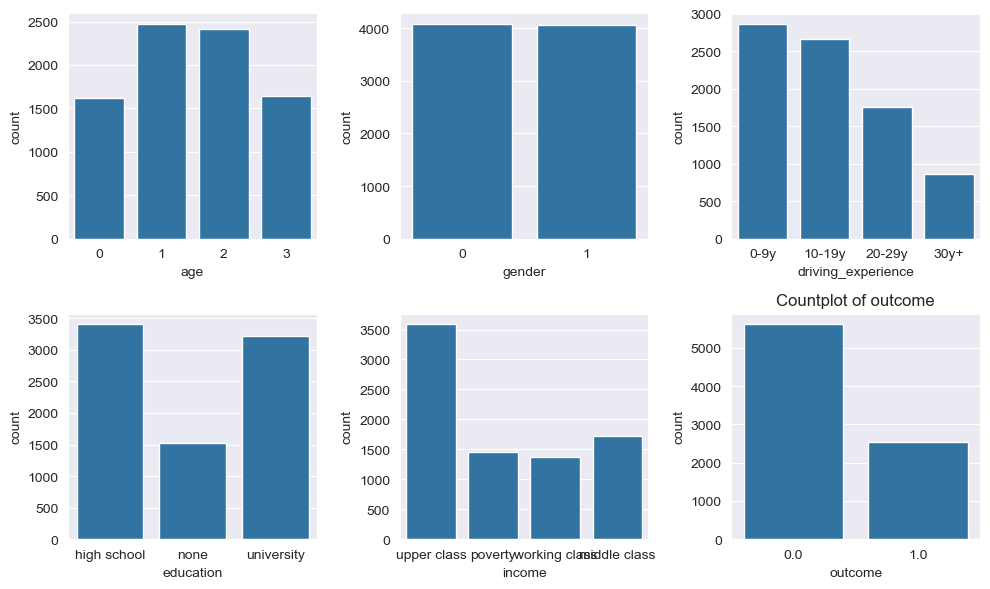

In [22]:
fig, axes = plt.subplots(2,3, figsize = (10,6))
axes = axes.flatten()

for i,col in enumerate(cat_cols):
    sns.countplot(x = col, data = data, ax = axes[i])
    plt.title(f'Countplot of {col}')
    
plt.tight_layout()
plt.show()

In [ ]:
data

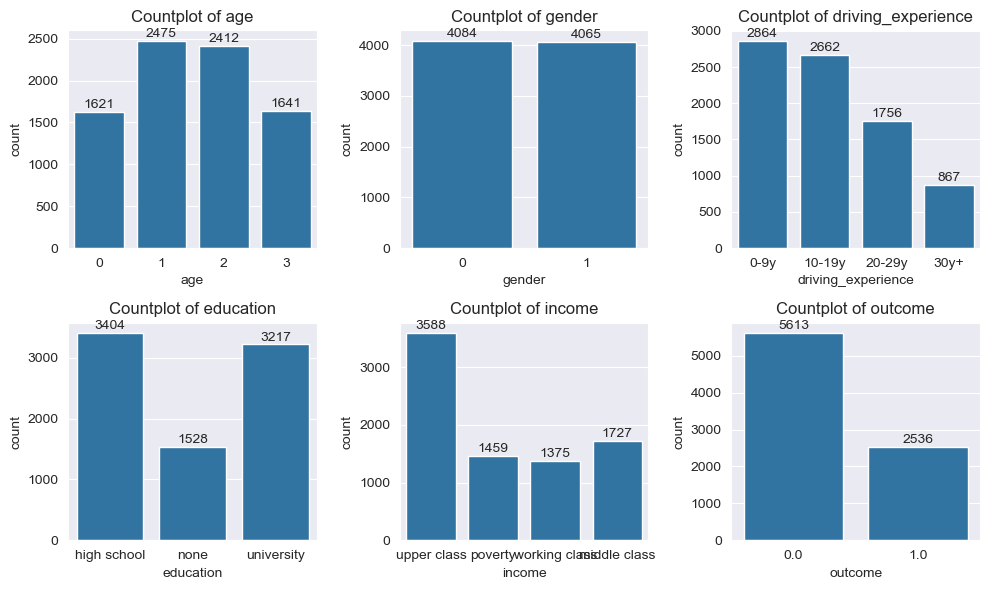

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(x=col, data=data, ax=ax)

    # Add counts on top of bars
    for p in ax.patches:
        ax.annotate(
            str(int(p.get_height())),                # text = bar height
            (p.get_x() + p.get_width() / 2., p.get_height()),  # position
            ha='center', va='center', xytext=(0, 5),  # offset above bar
            textcoords='offset points'
        )

    ax.set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


### Processing for Modeling
#### 1. Encoding
#### 2. feature scaling
#### 3. train, test , split

In [24]:
cat_cols

['age', 'gender', 'driving_experience', 'education', 'income', 'outcome']

In [25]:
bool_cols

['vehicle_ownership', 'vehicle_year', 'married', 'vehicle_type']

In [26]:
pdm = data.copy()

In [27]:
le_cols = ['driving_experience','education','income']

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for col in le_cols:
    le = LabelEncoder()
    pdm[col] = le.fit_transform(pdm[col])

pdm[le_cols]

,driving_experience,education,income
0,0,0,2
1,0,1,1
2,0,0,3
3,0,2,3
4,1,1,3
...,...,...,...
9994,1,0,0
9995,1,2,2
9997,0,0,0
9998,1,0,1


In [30]:
pdm[bool_cols] = pd.get_dummies(pdm[bool_cols], drop_first= True)


In [31]:
pdm

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0,0,2,0.629027,1.0,0.0,False,1.0,12000.0,False,0,0,0,0.0
1,0,1,0,1,1,0.357757,0.0,0.0,True,0.0,16000.0,False,0,0,0,1.0
2,0,0,0,0,3,0.493146,1.0,0.0,True,0.0,11000.0,False,0,0,0,0.0
3,0,1,0,2,3,0.206013,1.0,0.0,True,1.0,11000.0,False,0,0,0,0.0
4,1,1,1,1,3,0.388366,1.0,0.0,True,0.0,12000.0,False,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1,1,1,0,0,0.454300,1.0,0.0,True,0.0,16000.0,False,1,0,2,0.0
9995,1,0,1,2,2,0.582787,1.0,0.0,True,0.0,16000.0,False,0,0,1,0.0
9997,1,1,0,0,0,0.470940,1.0,0.0,True,1.0,14000.0,False,0,0,0,0.0
9998,1,0,1,0,1,0.364185,0.0,0.0,True,1.0,13000.0,False,2,0,1,1.0


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pdm['annual_mileage'] = scaler.fit_transform(pdm[['annual_mileage']])


In [ ]:
pdm['annual_mileage']

### Modeling

In [33]:
y = pdm['outcome']
X = pdm.drop('outcome', axis = 1)
print(y)
print(X)

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
9994    0.0
9995    0.0
9997    0.0
9998    1.0
9999    0.0
Name: outcome, Length: 8149, dtype: float64
      age  gender  driving_experience  education  income  credit_score  \
0       3       0                   0          0       2      0.629027   
1       0       1                   0          1       1      0.357757   
2       0       0                   0          0       3      0.493146   
3       0       1                   0          2       3      0.206013   
4       1       1                   1          1       3      0.388366   
...   ...     ...                 ...        ...     ...           ...   
9994    1       1                   1          0       0      0.454300   
9995    1       0                   1          2       2      0.582787   
9997    1       1                   0          0       0      0.470940   
9998    1       0                   1          0       1      0.364185   
9999    1 

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42, stratify= y)
print("Train Size:", X_train.shape)
print("Test Size",X_test.shape)

Train Size: (6519, 15)
Test Size (1630, 15)


#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score


log_reg = LogisticRegression(max_iter = 500)
skf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)
cv_scores = cross_val_score(log_reg,X_train,y_train, cv = skf,scoring = 'accuracy')

print("CV Scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

CV Scores: [0.83972393 0.85429448 0.85736196 0.83665644 0.82271681]
Mean CV accuracy: 0.8421507234367128
Test Accuracy: 0.8361963190184049

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1123
         1.0       0.75      0.72      0.73       507

    accuracy                           0.84      1630
   macro avg       0.81      0.80      0.81      1630
weighted avg       0.83      0.84      0.84      1630



#### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200,random_state= 42)
cv_score_rfc = cross_val_score(rfc, X_train, y_train,cv = skf, scoring = "accuracy")
print("CV Scores:", cv_score_rfc)
print("Mean CV accuracy:", np.mean(cv_score_rfc))
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

CV Scores: [0.8297546  0.83052147 0.83128834 0.81825153 0.81811205]
Mean CV accuracy: 0.8255856000075333
Test Accuracy: 0.8361963190184049

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1123
         1.0       0.75      0.72      0.73       507

    accuracy                           0.84      1630
   macro avg       0.81      0.80      0.81      1630
weighted avg       0.83      0.84      0.84      1630

